In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [3]:
# Read csv digikala file
digikala_data = pd.read_csv('digikala-orders.csv')
digikala_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [7]:
# change datetime format for use these
digikala_data['DateTime_CartFinalize'] = pd.to_datetime(digikala_data['DateTime_CartFinalize'])
digikala_data['YearMonth'] = digikala_data['DateTime_CartFinalize'].map(lambda date: 100 * date.year + date.month)
digikala_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [8]:
# Orders count per month
result = digikala_data.groupby(['YearMonth'])['ID_Order'].count().reset_index()
result.head()

,YearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141


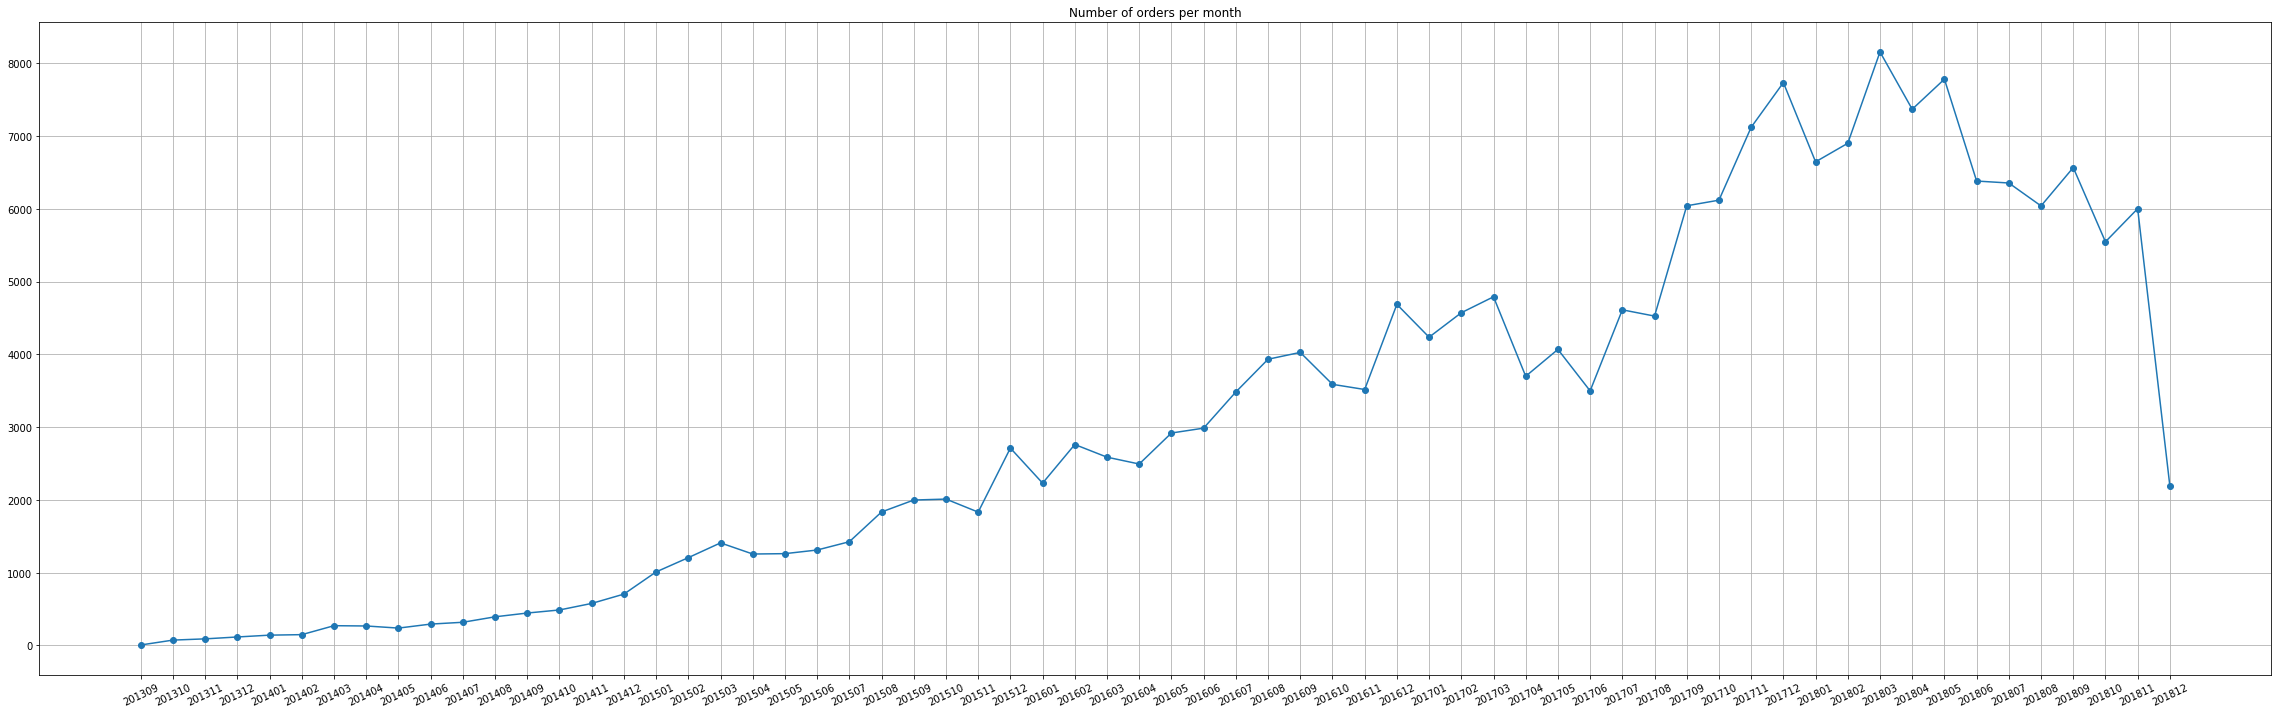

In [9]:
plt.figure(figsize=(40, 12))

plt.plot(result['YearMonth'].to_numpy(dtype=str), result['ID_Order'], marker='o')

plt.grid()
plt.xticks(rotation=25)

plt.title('Number of orders per month')
plt.show()

In [11]:
# Next Goal: Customers count per city
city = digikala_data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
city.head(10)

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
5,آبدانان,37
6,آبسرد,8
7,آبش احمد,3
8,آبعلی,2
9,آبپخش,17


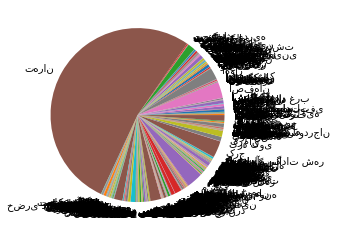

In [12]:
plt.pie(city['ID_Customer'], labels = city['city_name_fa'])
plt.show()

In [13]:
city = city.sort_values('ID_Customer', ascending = False).reset_index()
city.head(10)

,index,city_name_fa,ID_Customer
0,215,تهران,81048
1,815,کرج,4758
2,654,مشهد,4674
3,76,اصفهان,4664
4,97,اهواز,3353
5,505,شیراز,3076
6,355,رشت,2414
7,202,تبریز,2075
8,593,قم,1905
9,818,کرمانشاه,1718


In [14]:
result = city[0:9]
result

,index,city_name_fa,ID_Customer
0,215,تهران,81048
1,815,کرج,4758
2,654,مشهد,4674
3,76,اصفهان,4664
4,97,اهواز,3353
5,505,شیراز,3076
6,355,رشت,2414
7,202,تبریز,2075
8,593,قم,1905


In [15]:
s = (city[9:])['ID_Customer'].sum()
print(s)

final = result
final.loc[len(result)] = [0, 'Others', s]
final

45742


c:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,index,city_name_fa,ID_Customer
0,215,تهران,81048
1,815,کرج,4758
2,654,مشهد,4674
3,76,اصفهان,4664
4,97,اهواز,3353
5,505,شیراز,3076
6,355,رشت,2414
7,202,تبریز,2075
8,593,قم,1905
9,0,Others,45742


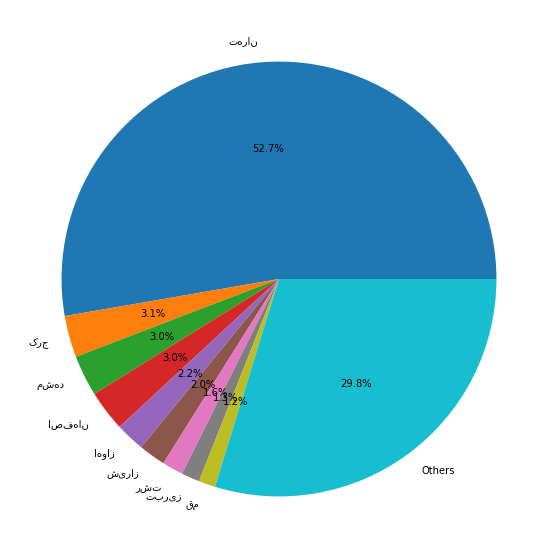

In [16]:
plt.figure(figsize=(10,10))
plt.pie(final['ID_Customer'], labels = final['city_name_fa'], autopct='%1.1f%%')
plt.show()

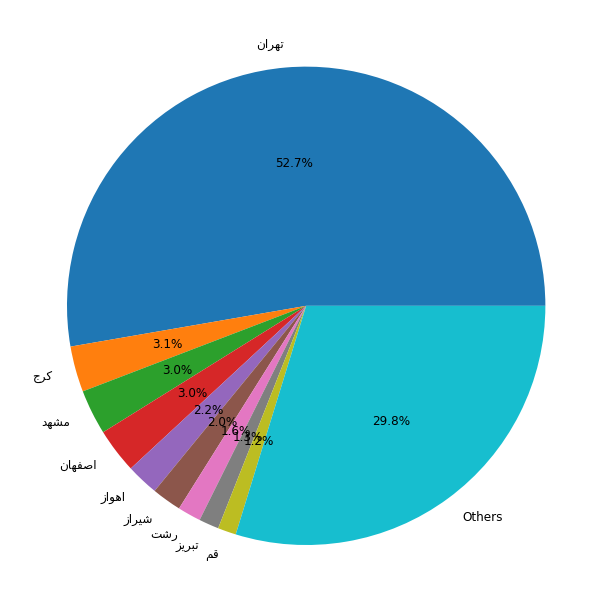

In [17]:
labels = final["city_name_fa"].values
persian = [get_display(reshape(label)) for label in labels]

plt.figure(figsize=(11, 11))
plt.pie(final["ID_Customer"], labels=persian, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.show()